# imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/rabito/Desktop/Rabito Docs/Documents/Career Foundry/Python/Instacart Basket Anaylsis'

In [3]:
df_merged_final = pd.read_pickle(os.path.join(path, 'Data','Prepared Data', '4.9_merge_final.pkl'))

# final data cleaning

In [4]:
#all columns moved to lower case and spaces marked with underscores
df_merged_final.columns = df_merged_final.columns.str.lower().str.replace(' ', '_')

In [5]:
df_merged_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'customer_max_order', 'customer_max_spent', 'spending_amount',
       'customer_frequency', 'frequency_flag', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'dependants', 'fam_status',
       'income'],
      dtype='object')

In [6]:
df_merged_final.value_counts ('state')

state
Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
Nevada                  636697
New York                636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mi

# creating region flags for each state

In [7]:
northeast_states = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [8]:
midwest_states= [ 'Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [9]:
south_states = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [10]:
west_states = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

# merging region flags

In [11]:
df_merged_final .loc[df_merged_final ['state'].isin(northeast_states),'regions']= 'northeast' 

In [12]:
df_merged_final .loc[df_merged_final ['state'].isin(midwest_states),'regions']= 'midwest' 

In [13]:
df_merged_final .loc[df_merged_final ['state'].isin(south_states),'regions']= 'south' 

In [14]:
df_merged_final .loc[df_merged_final ['state'].isin(west_states),'regions']= 'west' 

In [15]:
df_merged_final.value_counts('regions')

regions
south        10801610
west          8300445
midwest       7603810
northeast     5728347
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'south'),
  Text(1, 0, 'west'),
  Text(2, 0, 'midwest'),
  Text(3, 0, 'northeast')])

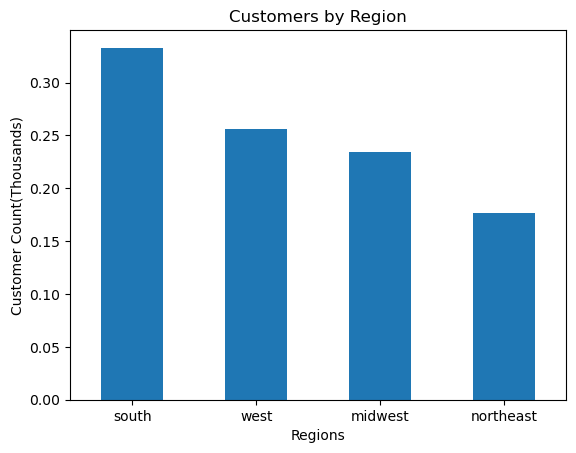

In [16]:
#More customers are shopping in the south than any other region.
bar = df_merged_final['regions'].value_counts('user_id').plot.bar()
plt.xlabel('Regions')
plt.ylabel('Customer Count(Thousands)')
plt.title('Customers by Region')
plt.xticks(rotation=0)

In [18]:
df_merged_final.loc[df_merged_final['order_number'] < 5, 'spending_flag'] = 'low spender'
df_merged_final.loc[(df_merged_final['order_number'] >= 5), 'spending_flag'] = 'high spender'

In [19]:
spending_by_region = pd.crosstab(df_merged_final['regions'], df_merged_final['spending_flag'], dropna = False)

In [20]:
spending_by_region

spending_flag,high spender,low spender
regions,,
midwest,5716510,1887300
northeast,4319468,1408879
south,8136355,2665255
west,6264458,2035987


In [21]:
spending_by_region.to_clipboard()

#5-9
Anaylze the data to help Instacart profile customers to best indentify areas of oppurtunity.

In [22]:
df_merged_final['age'].describe()

count    3.243421e+07
mean     4.946521e+01
std      1.848553e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

# defining income categories with visualizations

In [23]:
low_income_threshold = 35,000
middle_income_threshold = 70,000
high_income_threshold = 110,000

In [24]:
df_merged_final.loc[df_merged_final['income'] <= 75000, 'income_amount'] = 'low income'

In [25]:
df_merged_final.loc[(df_merged_final['income'] > 75000) & (df_merged_final['income'] < 110000), 'income_amount'] = 'middle income'

In [26]:
df_merged_final.loc[df_merged_final['income'] >= 110000, 'income_amount'] = 'high income'

In [27]:
df_merged_final['income_amount'].value_counts(dropna = False)

income_amount
high income      12075722
low income       10452848
middle income     9905642
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'high income'),
  Text(1, 0, 'low income'),
  Text(2, 0, 'middle income')])

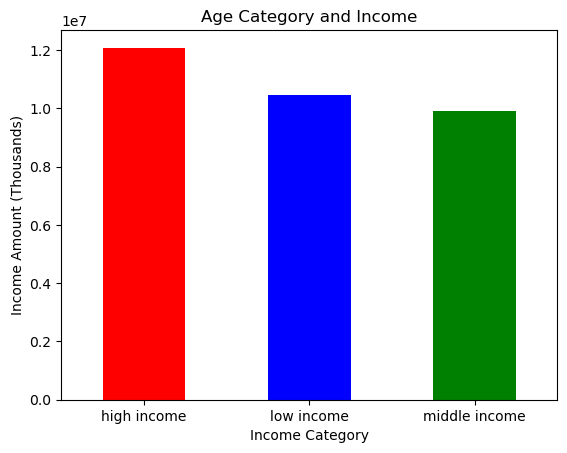

In [28]:
bar_1 = df_merged_final['income_amount'].value_counts().plot.bar(color = ['red','blue','green'])
plt.xlabel('Income Category')
plt.ylabel('Income Amount (Thousands)')
plt.title('Age Category and Income')
plt.xticks(rotation=0)

# defining age categories with visualizations

In [30]:
df_merged_final.loc[df_merged_final['age'] <= 25, 'age_category'] = 'young adult'

In [31]:
df_merged_final.loc[(df_merged_final['age'] > 25) & (df_merged_final['age'] <= 40), 'age_category'] = 'adult'

In [54]:
df_merged_final.loc[(df_merged_final['age'] > 40) & (df_merged_final['age'] <= 60), 'age_category'] = 'middle aged adult'

In [33]:
df_merged_final.loc[(df_merged_final['age'] > 60) & (df_merged_final['age'] <= 75), 'age_category'] = 'senior adult'

In [34]:
df_merged_final.loc[df_merged_final['age'] > 75, 'age_category'] = 'elderly adult'

In [55]:
df_merged_final['age_category'].value_counts(dropna = False)

age_category
middle aged adult    10161423
adult                 7631507
senior adult          7539494
young adult           4049009
elderly adult         3052779
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'middle aged adult'),
  Text(1, 0, 'adult'),
  Text(2, 0, 'senior adult'),
  Text(3, 0, 'young adult'),
  Text(4, 0, 'elderly adult')])

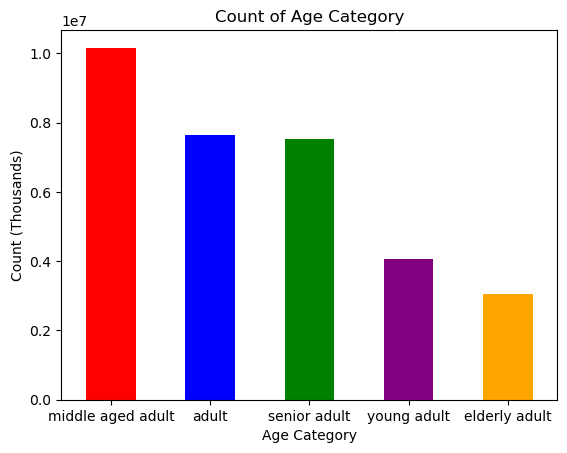

In [56]:
bar_2 = df_merged_final['age_category'].value_counts().plot.bar(color = ['red','blue','green','purple','orange'])
plt.xlabel('Age Category')
plt.ylabel('Count (Thousands)')
plt.title('Count of Age Category')
plt.xticks(rotation=0)

In [59]:
df_merged_final['customer_profile'] = df_merged_final['age_category'] + ', ' + df_merged_final['income_amount']

In [60]:
df_merged_final['customer_profile'].value_counts()

customer_profile
middle aged adult, high income      5824483
adult, low income                   4729646
senior adult, high income           4345980
adult, middle income                2803470
middle aged adult, middle income    2730845
young adult, low income             2472754
senior adult, middle income         2040112
elderly adult, high income          1754800
middle aged adult, low income       1606095
young adult, middle income          1524187
senior adult, low income            1153402
elderly adult, middle income         807028
elderly adult, low income            490951
adult, high income                    98391
young adult, high income              52068
Name: count, dtype: int64

In [61]:
age_income = pd.crosstab(df_merged_final['income_amount'], df_merged_final['age_category'], dropna = False)

In [62]:
df_merged_final.shape

(32434212, 40)

In [63]:
age_income

age_category,adult,elderly adult,middle aged adult,senior adult,young adult
income_amount,,,,,
high income,98391,1754800,5824483,4345980,52068
low income,4729646,490951,1606095,1153402,2472754
middle income,2803470,807028,2730845,2040112,1524187


In [64]:
age_spending = pd.crosstab(df_merged_final['spending_amount'], df_merged_final['age_category'], dropna = False)

In [65]:
age_spending

age_category,adult,elderly adult,middle aged adult,senior adult,young adult
spending_amount,,,,,
high_spender,98933,44282,143098,100300,46522
low_spender,7532574,3008497,10018325,7439194,4002487


In [66]:
age_loyalty = pd.crosstab(df_merged_final['loyalty_flag'], df_merged_final['age_category'], dropna = False)

In [67]:
age_loyalty

age_category,adult,elderly adult,middle aged adult,senior adult,young adult
loyalty_flag,,,,,
Loyal customer,2395992,958264,3248536,2409218,1281727
New customer,1456793,586247,1960114,1465020,781224
Regular customer,3778722,1508268,4952773,3665256,1986058


# histogram of busiest hours of the day

Text(0.5, 1.0, 'Histogram of Order Time of Day')

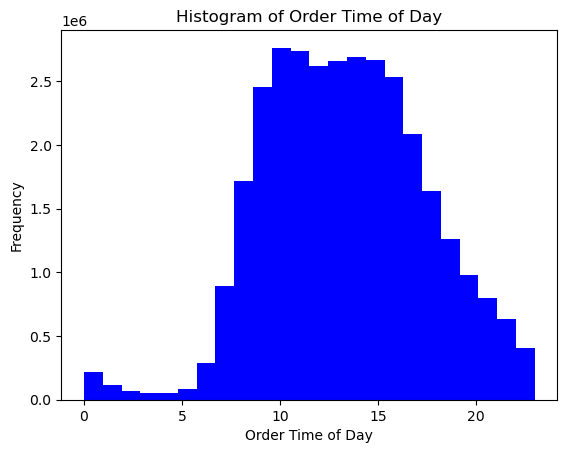

In [68]:
hist = df_merged_final['order_hour_of_day'].plot.hist(bins = 24, color = 'blue')
plt.xlabel('Order Time of Day') 
plt.title('Histogram of Order Time of Day')

 # aggregating mean,min,and max of 'prices'

In [70]:
#Dropping outlier values in prices data
df_merged_final.loc[df_merged_final['prices'] >100, 'prices'] = np.nan

In [71]:
pd.crosstab(df_merged_final['order_hour_of_day'], df_merged_final['prices'], dropna = True)

prices,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,24.1,24.2,24.3,24.4,24.5,24.6,24.7,24.8,24.9,25.0
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0.0,790,1712,1667,2825,2692,1022,2065,1557,2131,1033,...,5,112,17,1,9,22,45,2,37,99
1.0,370,896,880,1480,1372,573,1093,813,1165,581,...,1,69,11,2,9,8,23,2,18,37
2.0,243,513,523,891,820,331,639,542,667,348,...,3,33,6,2,3,2,10,1,11,31
3.0,190,386,389,569,550,262,453,371,492,255,...,1,22,4,2,1,3,16,2,9,19
4.0,198,403,438,733,624,247,497,381,452,260,...,1,16,11,1,3,2,19,1,7,16
5.0,331,714,701,1182,1073,429,789,576,847,438,...,2,60,11,1,6,4,20,1,17,36
6.0,940,2306,2111,4107,3484,1377,2759,1935,2942,1405,...,6,147,32,5,22,21,53,3,71,137
7.0,3052,6852,6567,12632,11012,4147,8531,5921,9110,4097,...,21,486,69,14,54,54,240,4,201,366
8.0,5532,13285,13012,23670,21101,8046,16532,11331,18055,7971,...,55,934,155,21,106,94,412,21,319,691


In [72]:
df_freqt_customer_order = df_merged_final.groupby('customer_profile').agg({'prices': ['mean']})


In [73]:
df_freqt_customer_order

,prices
,mean
customer_profile,
"adult, high income",7.817668
"adult, low income",7.688148
"adult, middle income",7.965133
"elderly adult, high income",7.964373
"elderly adult, low income",6.886511
"elderly adult, middle income",7.973414
"middle aged adult, high income",7.963774
"middle aged adult, low income",6.881495


Text(0.5, 1.0, 'Average Price of Customer Profiles')

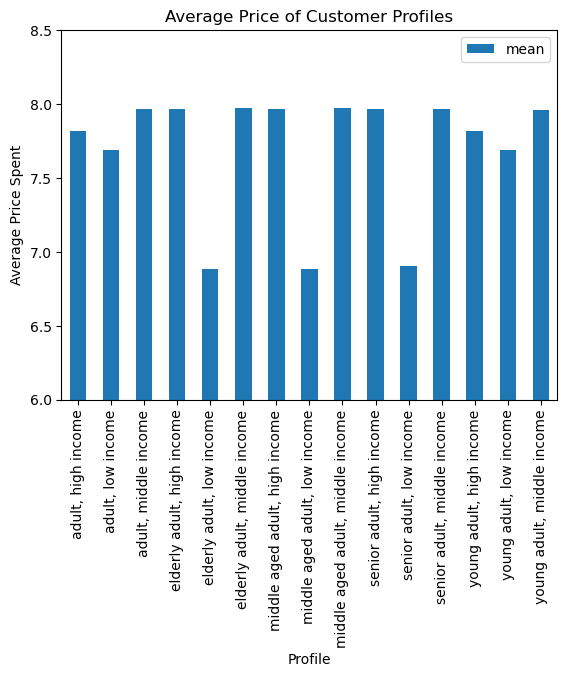

In [78]:
bar_3 = df_freqt_customer_order['prices'].plot.bar()
plt.ylim(6, 8.5)
plt.xlabel('Profile')
plt.ylabel('Average Price Spent')
plt.title('Average Price of Customer Profiles')

In [80]:
df_freqt_loyalty_order = df_merged_final.groupby('loyalty_flag').agg({'prices': ['mean']})

In [81]:
df_freqt_loyalty_order

,prices
,mean
loyalty_flag,
Loyal customer,7.778434
New customer,7.805661
Regular customer,7.802976


# comparing customer profiles to departments and regions

In [82]:
pd.crosstab(df_merged_final['customer_profile'], df_merged_final['department_id'], dropna = False)

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
"adult, high income",7762,255,4649,21195,2246,730,8597,498,2842,17,...,2651,6057,2356,3738,17566,4638,587,8027,2442,143
"adult, low income",319953,5087,169386,1374290,20551,38401,398475,13535,122051,5207,...,96774,269054,106380,152990,784024,106672,59308,459052,154299,9939
"adult, middle income",193713,3209,101868,843927,14038,24809,217106,7923,77728,2862,...,65447,163630,57314,96005,479767,61527,39857,216615,91057,6122
"elderly adult, high income",123268,1915,64567,525802,8062,15253,137045,5969,48982,1766,...,42326,103173,37035,59688,295118,39275,23841,136827,57586,3662
"elderly adult, low income",32757,460,16141,126405,2277,3350,52714,1215,9838,637,...,5859,25051,13602,12694,74104,12653,3772,74555,15004,996
"elderly adult, middle income",56621,966,30558,239191,3598,6943,64105,2645,22668,940,...,19143,47348,16545,27445,136500,18084,11387,63268,26225,1753
"middle aged adult, high income",406359,6384,215147,1739333,29114,49672,457119,18321,162511,5630,...,138092,348445,123550,201980,985461,130748,78933,447987,187627,12498
"middle aged adult, low income",103020,1860,52530,412810,7813,10813,171139,3926,33915,2237,...,19394,81938,42776,39966,245095,39858,14900,244050,51231,3434
"middle aged adult, middle income",190662,3127,102185,813513,11000,23852,219622,8092,75646,2907,...,64172,160269,57216,92060,460197,60667,40182,210859,89702,5834


In [83]:
pd.crosstab(df_merged_final['customer_profile'], df_merged_final['order_hour_of_day'], dropna = False)

order_hour_of_day,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
customer_profile,,,,,,,,,,,,,,,,,,,,,
"adult, high income",702,271,157,131,205,196,887,3289,5621,7745,...,8324,8172,8521,6717,4908,3434,2727,1727,1936,937
"adult, low income",32991,16947,10228,7650,7156,11937,40926,126303,249861,363469,...,394222,388643,367240,298415,234920,180506,139965,117358,95902,58078
"adult, middle income",20017,10435,6171,4811,4762,7949,25577,78000,148586,208807,...,232679,233030,217619,180312,142611,108426,85357,69933,56548,34954
"elderly adult, high income",11050,6501,4173,3025,2714,4648,16169,49200,92670,130075,...,150667,142060,136879,115859,90308,68747,53729,44681,35018,21380
"elderly adult, low income",3281,1414,1124,717,736,1387,4073,13609,26901,42062,...,39232,38618,37416,31561,24063,17983,13626,11215,8802,5245
"elderly adult, middle income",5785,3157,1535,1425,1314,2010,7423,21633,42453,59413,...,68927,65566,63689,51587,41109,32236,24888,21856,17629,11106
"middle aged adult, high income",38794,20696,11548,8498,8778,15726,52064,160857,305953,428634,...,484451,481922,455141,380854,300601,232734,180337,145330,115803,75261
"middle aged adult, low income",9578,5288,3407,2335,2334,3742,12633,41774,87012,137177,...,128430,126140,123184,102833,78013,58256,45232,35124,27242,18199
"middle aged adult, middle income",19314,10440,5850,4384,4339,7409,24916,75319,148726,202101,...,226280,227136,215353,177119,138612,103955,83136,68433,54123,35273


In [17]:
# Maping deparment id to names
department_mapping= {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
}

In [18]:
df_merged_final['department_name'] =df_merged_final['department_id'].map(department_mapping).fillna('missing')

In [19]:
pd.crosstab(df_merged_final['department_name'], df_merged_final['regions'], dropna = False)

regions,midwest,northeast,south,west
department_name,,,,
alcohol,36195,26559,51633,39356
babies,98983,75139,143654,106026
bakery,274777,209468,390294,302248
beverages,625585,483422,898957,680195
breakfast,165269,125068,236753,183557
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1267696,956809,1801966,1387545
deli,245678,186817,349419,269335


In [20]:
#Creating bar chart with values and organzing
loyal_dept_group = df_merged_final.groupby(['department_name', 'regions']).size().unstack()

In [21]:
loyal_dept_group

regions,midwest,northeast,south,west
department_name,,,,
alcohol,36195,26559,51633,39356
babies,98983,75139,143654,106026
bakery,274777,209468,390294,302248
beverages,625585,483422,898957,680195
breakfast,165269,125068,236753,183557
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1267696,956809,1801966,1387545
deli,245678,186817,349419,269335


In [22]:
#Creating bar chart with values and organzing
df_loyal_dept_group = loyal_dept_group.sort_values(by = 'west', ascending = False)

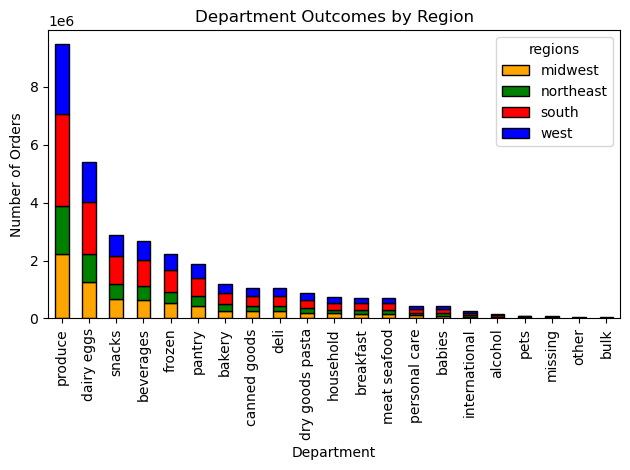

In [24]:
colors = ['peru', 'palegreen','skyblue']
region_dept_group_bar = df_loyal_dept_group.plot(kind='bar', stacked=True, edgecolor = 'black', color=['orange','green','red','blue'])
plt.title('Department Outcomes by Region')
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [ ]:
#Setting Interval ranges for chart
interval_range = pd.interval_range(start=1, freq=3, end=25)
df_merged_final['price_ranges'] = pd.cut(df_merged_final['prices'], bins=interval_range)

In [94]:
df_merged_final['price_ranges'].value_counts()

price_ranges
(4, 7]      7758345
(1, 4]      7507462
(7, 10]     6509015
(10, 13]    6217226
(13, 16]    3935256
(22, 25]     149909
(19, 22]     134597
(16, 19]     102132
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '(16, 19]'),
  Text(1, 0, '(19, 22]'),
  Text(2, 0, '(22, 25]'),
  Text(3, 0, '(13, 16]'),
  Text(4, 0, '(10, 13]'),
  Text(5, 0, '(7, 10]'),
  Text(6, 0, '(1, 4]'),
  Text(7, 0, '(4, 7]')])

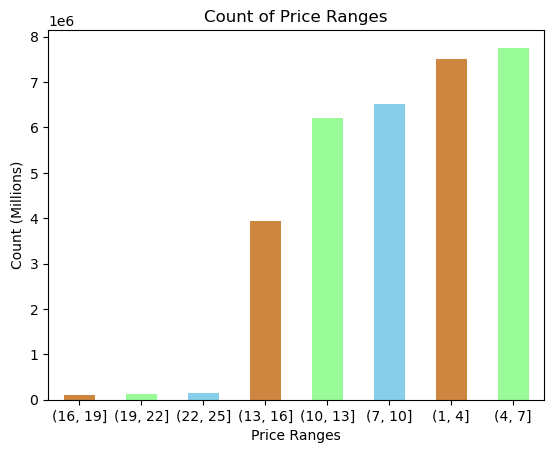

In [95]:
bar_3 = df_merged_final['price_ranges'].value_counts(ascending=True).plot.bar(color=colors)
plt.xlabel('Price Ranges')
plt.ylabel('Count (Millions)')
plt.title('Count of Price Ranges')
plt.xticks(rotation=0)

# exports

In [97]:
#export graphs
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations','4.10_region_count_bar.png'))
bar_1.figure.savefig(os.path.join(path, 'Analysis','Visualizations','4.10_age_income_bar.png'))
bar_2.figure.savefig(os.path.join(path, 'Analysis','Visualizations','4.10_age_count_bar.png'))
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', '4.10_busiest_hour_of_day_hist.png'))
bar_3.figure.savefig(os.path.join(path, 'Analysis','Visualizations','4.10_customer_profile_count_bar.png'))
region_dept_group_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations','4.10_departments_regions_bar.png'))

In [89]:
#export df
df_merged_final.to_pickle(os.path.join(path, 'Data','Prepared Data', '4.10_Final_A.pkl'))